In [1]:
import moodpy02 as me
import numpy as np

In [2]:
label = "P208_ln"
forma = "\ln(u)"
cabecera = """
<h1> Integrales por tabla</h1>
<h2> Integrando de la forma \(f(x)={}\)</h2>
""".format(forma)

<h1>P208_ln</h1>


<h1> Integrales por tabla</h1>
<h2> Integrando de la forma \(f(x)=\ln(u)\)</h2>



x |--> -5*x - 5

x |--> -10/9*log(-5*x - 5)

-\frac{10}{9} \, \log\left(-5 \, x - 5\right)
(-10/9*log(-5*x - 5), -35, -75)


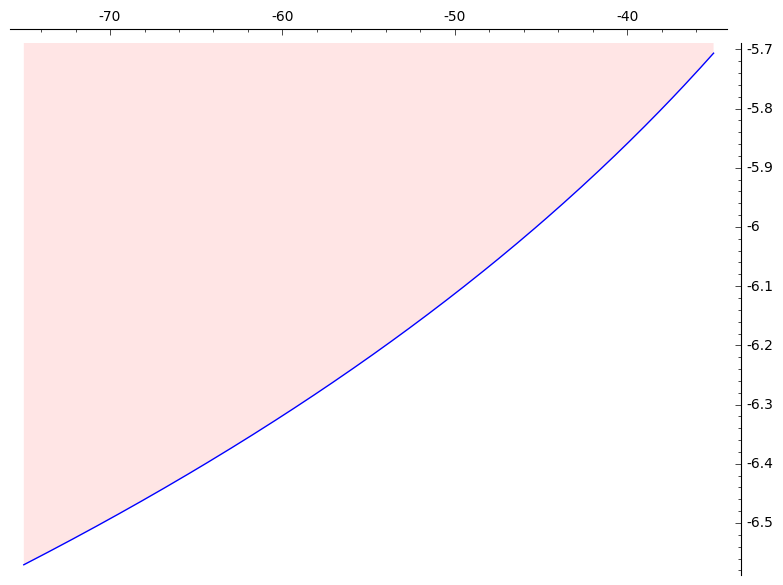

<h1> Integrales por tabla</h1>
    <h2> Integrando de la forma \(f(x)=\ln(u)\)</h2>
    
    <p> Encuentre el valor promedio de la función \(f(x)=-\frac{10}{9} \, \log\left(-5 \, x - 5\right)\) en el intervalo \([-75,-35]\).</p>
    <p>
    <img src="@@PLUGINFILE@@/1524667231.04.png" alt="imagen" width="600" height="400" />
    </p>
    <pre> Valor promedio = {1:NM:=-6.19394654326453:-0.185818396297936} </pre>
    
    Una antiderivada para \(-\frac{10}{9} \, \log\left(-5 \, x - 5\right)\) está dada por \(F(x)=-\frac{10}{9} \, {\left(x + 1\right)} \log\left(-5 \, x - 5\right) + \frac{10}{9} \, x + \frac{10}{9}\).


    <questiontext format="html">
<text>
<![CDATA[

    <h1> Integrales por tabla</h1>
    <h2> Integrando de la forma \(f(x)=\ln(u)\)</h2>
    
    <p> Encuentre el valor promedio de la función \(f(x)=-\frac{10}{9} \, \log\left(-5 \, x - 5\right)\) en el intervalo \([-75,-35]\).</p>
    <p>
    <img src="@@PLUGINFILE@@/1524667231.04.png" alt="imagen" width="600" height="400" />
    </p>
    <pre> Valor promedio = {1:NM:=-6.19394654326453:-0.185818396297936} </pre>
    
]]>
</text>
    <file name="1524667231.04.png" path="/" encoding="base64">iVBORw0KGgoAAAANSUhEUgAAAw8AAAJJCAYAAADsqgsTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAIABJREFUeJzs3Xl4VOXh9vH7mcm+zCSTQASqNCAKqFRrFVxQUQGJSNhEAgiERZRNQAVRcaGigra2VgStskqOoojIVsQICSIC4gJWhEKRClWIiIkgQoac9w9+5m0UYoJMzizfz3Xljzlz5jn3xXWceOd5zjnGtm1bAAAAAPALXE4HAAAAABAaKA8AAAAAqoTyAAAAAKBKKA8AAAAAqoTyAAAAAKBKKA8AAAAAqoTyAAAAAKBKKA8AAAAAqoTyAAAAAKBKKA8AAAAAqoTyEORcLpfcbrdcLleFnz/96U/l++zfv189e/aU1+tVamqqBgwYoIMHDzqYGpFu8+bNys7OVkpKipKSktS8eXP

In [5]:
def gen(impr):
    
    data = {}
    ans = {}
    tex = {}
    
    ### Definición de antiderivada
    x=var("x")
    while True:
        p = np.random.randint(-10,10)
        if p!=0:
            break
    q = np.random.randint(-10,10)*p
    u(x) = p*x+q
    F(x) = u(x)*ln(u(x))-u(x)
    
    while True:
        M = np.random.randint(-10,10)
        if M!=0:
            break
    N = np.random.randint(1,10)
    F(x) = M*F(x)/N    
    f(x) = F.diff(x)(x)
    
    li = int(-1.*q/p)
    a0 = li+1+np.random.poisson(10); a=u(a0)
    b0 = a0+1+np.random.poisson(10); b=u(b0)
    I = (F(b)-F(a))/(b-a); I = I.n()
    
    ### grafica    
    g = Graphics()
    if impr:
        show(u)
        show(f)
        print latex(f(x))
        print(f(x),a,b)
        
    if a<=b:
        if 0<=I:
            g += plot(f,(x,a,b), fill=True, fillcolor="blue", fillalpha=0.1)
        else:
            g += plot(f,(x,a,b), fill=True, fillcolor="red", fillalpha=0.1)
    else:
        if 0<=I:
            g += plot(f,(x,b,a), fill=True, fillcolor="blue", fillalpha=0.1)
        else:
            g += plot(f,(x,b,a), fill=True, fillcolor="red", fillalpha=0.1)
        
    
    xx = np.linspace(a.n(),b.n())    
    m = min([f(u) for u in xx])
    M = max([f(u) for u in xx])
    g.ymin(m)
    g.ymax(M)
    g.set_aspect_ratio("automatic")
    
    if impr:
        show(g)

    filename, encoded = me.encodeGraf(g)
    im = me.tagImg(filename)    
    s = me.fileImg(filename, encoded)
    
    ### HTML
    
    tex["forma"] = forma
    data["im"] = im    
    ans["I"]=me.NM(I.n())
    tex["f"] = latex(f(x))
    tex["F"] = latex(F(x))
    
    if a<=b:
        tex["intervalo"] = "[{},{}]".format(latex(a),latex(b))
    else:
        tex["intervalo"] = "[{},{}]".format(latex(b),latex(a))    
        
    cabecera = """
    <h1> Integrales por tabla</h1>
    <h2> Integrando de la forma \(f(x)={tex[forma]}\)</h2>
    """.format(tex=tex)
        
    ejercicio = cabecera + """
    <p> Encuentre el valor promedio de la función \(f(x)={tex[f]}\) en el intervalo \({tex[intervalo]}\).</p>
    {data[im]}
    <pre> Valor promedio = {ans[I]} </pre>
    """.format(tex=tex, data=data, ans=ans)
    
    F(x) = f.integral(x)(x)
    tex["F"] = latex(F(x))
    
    retroalimentacion = """
    Una antiderivada para \({tex[f]}\) está dada por \(F(x)={tex[F]}\). 
    """.format(tex=tex)
    if impr:
        show(html(ejercicio+retroalimentacion))
    return me.pretty(ejercicio, retroalimentacion, im1=s)

np.random.seed(1)
show(html("<h1>"+label+"</h1>"))
print(cabecera)
me.quick(gen, label, 0, impr=True)

In [29]:
np.random.seed(12)
#me.quick(gen, label, 5, impr=True)

In [30]:
np.random.seed(123)
#me.quick(gen, label, 99, impr=False)